In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.options.display.float_format = '{:.2f}'.format


In [2]:
df=pd.read_csv("cs-training.csv",index_col=0)

# Analyse du jeu de données

In [3]:
df.head(15)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.77,45,2,0.80,9120.00,13,0,6,0,2.00
2,0,0.96,40,0,0.12,2600.00,4,0,0,0,1.00
3,0,0.66,38,1,0.09,3042.00,2,1,0,0,0.00
4,0,0.23,30,0,0.04,3300.00,5,0,0,0,0.00
5,0,0.91,49,1,0.02,63588.00,7,0,1,0,0.00
6,0,0.21,74,0,0.38,3500.00,3,0,1,0,1.00
7,0,0.31,57,0,5710.00,nan,8,0,3,0,0.00
8,0,0.75,39,0,0.21,3500.00,8,0,0,0,0.00
9,0,0.12,27,0,46.00,nan,2,0,0,0,nan
10,0,0.19,57,0,0.61,23684.00,9,0,4,0,2.00


In [4]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.00,150000.00,150000.00,150000.00,150000.00,120269.00,150000.00,150000.00,150000.00,150000.00,146076.00
mean,0.07,6.05,52.30,0.42,353.01,6670.22,8.45,0.27,1.02,0.24,0.76
std,0.25,249.76,14.77,4.19,2037.82,14384.67,5.15,4.17,1.13,4.16,1.12
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.03,41.00,0.00,0.18,3400.00,5.00,0.00,0.00,0.00,0.00
50%,0.00,0.15,52.00,0.00,0.37,5400.00,8.00,0.00,1.00,0.00,0.00
75%,0.00,0.56,63.00,0.00,0.87,8249.00,11.00,0.00,2.00,0.00,1.00
max,1.00,50708.00,109.00,98.00,329664.00,3008750.00,58.00,98.00,54.00,98.00,20.00


7% des individus de notre jeu de données ont fait défaut à leur crédit sur plus de 2 ans

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


### Environ 30,000 lignes de notre jeu de données n'ont pas de données correspondante à "Monthly Income", nous allons droper ces lignes pour le reste de l'exercice

In [6]:
filter1=pd.isnull(df.MonthlyIncome)
df=df[filter1==False]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120269 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        120269 non-null int64
RevolvingUtilizationOfUnsecuredLines    120269 non-null float64
age                                     120269 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    120269 non-null int64
DebtRatio                               120269 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         120269 non-null int64
NumberOfTimes90DaysLate                 120269 non-null int64
NumberRealEstateLoansOrLines            120269 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    120269 non-null int64
NumberOfDependents                      120269 non-null float64
dtypes: float64(4), int64(7)
memory usage: 11.0 MB


In [8]:
corr=df.corr()

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)

### Entraînons un premier modèle de Random Forrest sur notre jeu de données

In [10]:
from sklearn.preprocessing import StandardScaler

features=df.iloc[:,1:]
target=df.iloc[:,0]

nm=StandardScaler()

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.20)

X_train=nm.fit_transform(X_train)
X_test=nm.transform(X_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(96215, 10)
(24054, 10)
(96215,)
(24054,)


C:\Users\Aziz\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aziz\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Aziz\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]


In [11]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()

rfc.fit(X_train,y_train)
print(rfc.score(X_test,y_test))

from sklearn.metrics import confusion_matrix

matrix=confusion_matrix(y_test,rfc.predict(X_test))

print(matrix)

0.9298245614035088
[[22073   275]
 [ 1413   293]]


Text(0.5, 1.0, 'Confusion Matrix')

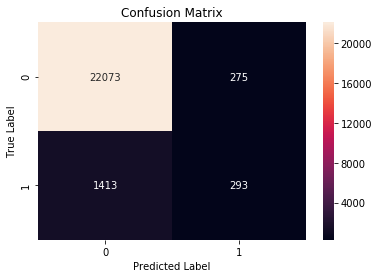

In [12]:

import seaborn as sns



sns.heatmap(matrix,annot=True,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')


### Malgré une accuracy assez haute, notre modèle a du mal à détecter les cas de fraudes puisque nous comptons de nombreux faux-négatifs... Tentons l'entraînement de notre modèle en augmentant le nombre (et donc la proportion) des défaut de crédit ("SeriousDlqin2yrs" = 1)

In [49]:
filter2= df.SeriousDlqin2yrs==1

df_concat=pd.merge(df,pd.concat([df[filter2]]*2),how="outer")

In [50]:
df_concat.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,128634.00,128634.00,128634.00,128634.00,128634.00,128634.00,128634.00,128634.00,128634.00,128634.00,128634.00
mean,0.13,5.75,50.94,0.49,26.27,6602.31,8.72,0.31,1.05,0.27,0.86
std,0.34,249.97,14.38,4.25,421.39,14000.19,5.21,4.23,1.17,4.21,1.16
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.04,40.00,0.00,0.14,3340.00,5.00,0.00,0.00,0.00,0.00
50%,0.00,0.20,50.00,0.00,0.30,5305.00,8.00,0.00,1.00,0.00,0.00
75%,0.00,0.64,61.00,0.00,0.49,8133.75,11.00,0.00,2.00,0.00,2.00
max,1.00,50708.00,103.00,98.00,61106.50,3008750.00,58.00,98.00,54.00,98.00,20.00


Dans ce nouveau jeu de données, 23% des individus ont fait défaut à leur crédit au lieu de 7% dans le jeu de données initial

In [59]:
from sklearn.preprocessing import StandardScaler

features=df_concat.iloc[:,1:]
target=df_concat.iloc[:,0]

nm=StandardScaler()


from sklearn.model_selection import train_test_split

X2_train,X2_test,y2_train,y2_test=train_test_split(features,target,test_size=0.15)

X2_train=nm.fit_transform(X2_train)
X2_test=nm.transform(X2_test)

print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(109338, 10)
(19296, 10)
(109338,)
(19296,)


C:\Users\Aziz\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aziz\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Aziz\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [60]:
from sklearn.ensemble import RandomForestClassifier

rfc2=RandomForestClassifier()

rfc2.fit(X2_train,y2_train)
print(rfc2.score(X2_test,y2_test))

matrix=confusion_matrix(y2_test,rfc2.predict(X2_test))

print(matrix)

0.9568304311774462
[[16539   342]
 [  491  1924]]


Nous arrivons à augmenter notre score d'accuracy à 97,6% et notre jeu de données arrive enfin à détecter la majorité des défaut de crédit, vérifions si ce modèle ce vérifie sur l'ensemble du jeu de données (normalisé)

Text(0.5, 1.0, 'Confusion Matrix')

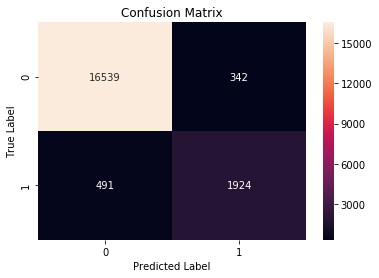

In [61]:


sns.heatmap(matrix,annot=True,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

0.9292841107508106
[[22328    20]
 [ 1681    25]]


Text(0.5, 1.0, 'Confusion Matrix')

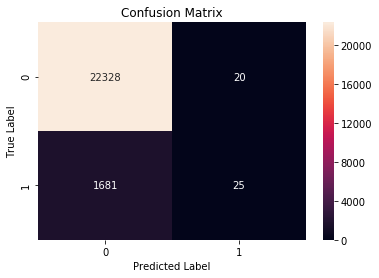

In [62]:
print(rfc2.score(nm.transform(X_test),y_test))
matrix=confusion_matrix(y_test,rfc2.predict(nm.transform(X_test)))
print(matrix)



sns.heatmap(matrix,annot=True,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

Nous observons que le nouveau modèle ne fonctionne toujours pas correctement sur le jeu de données initial.

# Prenons un peu de recul, essayons de mieux regarder nos données

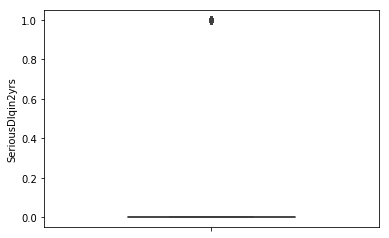

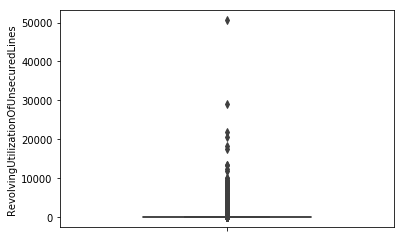

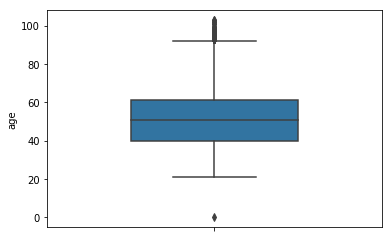

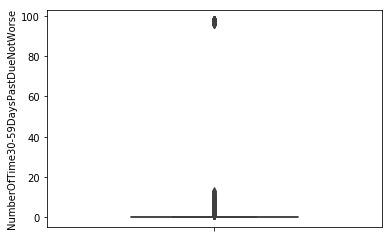

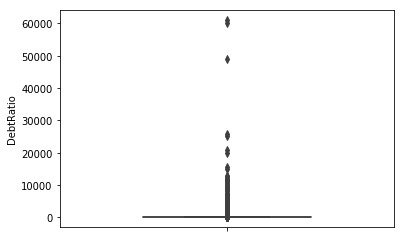

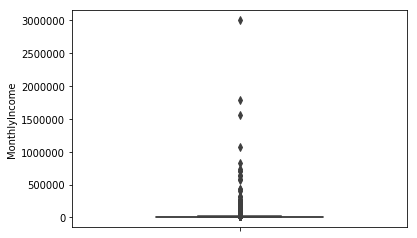

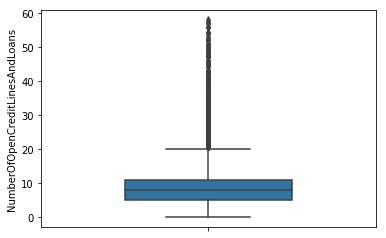

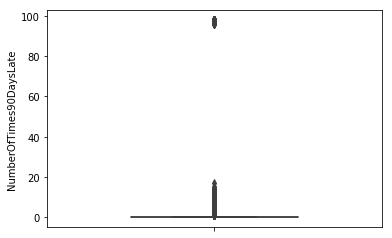

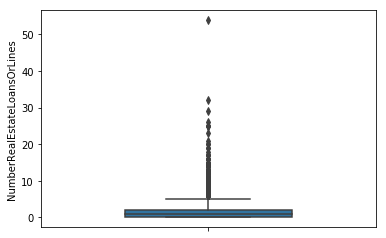

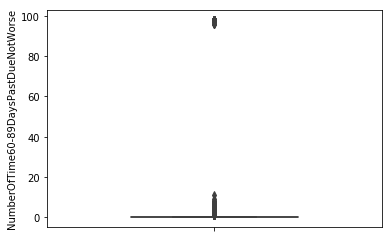

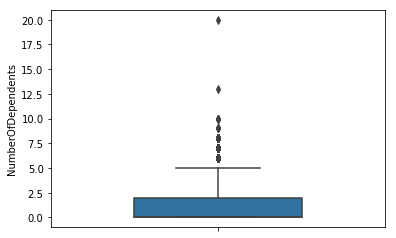

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in range(0,len(df.columns)):
    plt.figure(i)
    sns.boxplot(y=df.columns[i],data=df,width=0.5,showfliers=True)

### On constate des outliers très importants pour la plupart des variables de notre jeu de données. Nous nous proposons de séparer ces outliers de la majorité des données et de leur assigner leur propre modèle. Nous utiliserons la méthode d'identification des outliers basée sur l'espace inter-quartile (IQR) qui apporte de meilleurs résultats que le z-score.

In [19]:
Q1 = df.iloc[:,1:].quantile(0.25)
Q3 = df.iloc[:,1:].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

RevolvingUtilizationOfUnsecuredLines      0.54
age                                      21.00
NumberOfTime30-59DaysPastDueNotWorse      0.00
DebtRatio                                 0.34
MonthlyIncome                          4849.00
NumberOfOpenCreditLinesAndLoans           6.00
NumberOfTimes90DaysLate                   0.00
NumberRealEstateLoansOrLines              2.00
NumberOfTime60-89DaysPastDueNotWorse      0.00
NumberOfDependents                        2.00
dtype: float64


In [63]:
df_no_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_no_out

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
2,0,0.96,40,0,0.12,2600.00,4,0,0,0,1.00
4,0,0.23,30,0,0.04,3300.00,5,0,0,0,0.00
6,0,0.21,74,0,0.38,3500.00,3,0,1,0,1.00
8,0,0.75,39,0,0.21,3500.00,8,0,0,0,0.00
11,0,0.64,30,0,0.31,2500.00,5,0,0,0,0.00
12,0,0.02,51,0,0.53,6501.00,7,0,2,0,2.00
13,0,0.01,46,0,0.30,12454.00,13,0,2,0,2.00
16,0,0.55,64,0,0.21,11362.00,7,0,1,0,2.00
18,0,0.17,53,0,0.19,8800.00,7,0,0,0,0.00
19,0,0.22,43,0,0.53,3280.00,7,0,1,0,2.00


In [64]:
df_no_out.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,82537.00,82537.00,82537.00,82537.00,82537.00,82537.00,82537.00,82537.00,82537.00,82537.00,82537.00
mean,0.03,0.27,51.93,0.00,0.30,6028.81,8.13,0.00,0.95,0.00,0.79
std,0.16,0.32,14.84,0.00,0.22,3193.62,4.24,0.00,0.94,0.00,1.09
min,0.00,0.00,21.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.03,41.00,0.00,0.12,3583.00,5.00,0.00,0.00,0.00,0.00
50%,0.00,0.12,51.00,0.00,0.27,5470.00,8.00,0.00,1.00,0.00,0.00
75%,0.00,0.44,63.00,0.00,0.43,8000.00,11.00,0.00,2.00,0.00,1.00
max,1.00,1.38,92.00,0.00,0.99,15509.00,20.00,0.00,5.00,0.00,5.00


Dans ce nouveau jeu de données la part des individus ayant fait défaut de crédit n'est que de 3%, nous allons utiliser la même technique que précédemment et entraîner notre modèle sur un jeu de données contenant une plus forte proportion de ces individus

In [65]:
filter2= df.SeriousDlqin2yrs==1

df_concat_no_out=pd.merge(df_no_out,pd.concat([df_no_out[filter2]]*2),how="outer")
from sklearn.preprocessing import StandardScaler

features=df_concat_no_out.iloc[:,1:]
target=df_concat_no_out.iloc[:,0]

nm=StandardScaler()

from sklearn.model_selection import train_test_split

X2_train,X2_test,y2_train,y2_test=train_test_split(features,target,test_size=0.15)

X2_train=nm.fit_transform(X2_train)
X2_test=nm.transform(X2_test)

print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

C:\Users\Aziz\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Aziz\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


(72085, 10)
(12721, 10)
(72085,)
(12721,)


C:\Users\Aziz\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Aziz\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


In [66]:
df_concat_no_out["SeriousDlqin2yrs"].sum()

4538

In [68]:
from sklearn.ensemble import RandomForestClassifier

rfc2=RandomForestClassifier()

rfc2.fit(X2_train,y2_train)
print(rfc2.score(X2_test,y2_test))

matrix=confusion_matrix(y2_test,rfc2.predict(X2_test))

print(matrix)



0.9801902366166182
[[12003    14]
 [  238   466]]


In [69]:
print(rfc2.score(X2_train,y2_train))

0.9979607407921204


C:\Users\Aziz\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
C:\Users\Aziz\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


(57775, 10)
(24762, 10)
(57775,)
(24762,)
0.9975941151016876
0.9972538567159357
[[24049     4]
 [   64   645]]


Text(0.5, 1.0, 'Confusion Matrix')

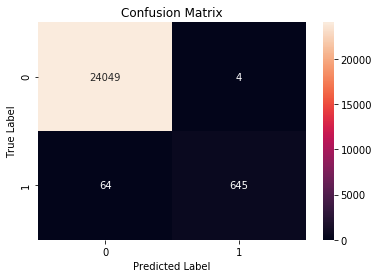

In [71]:
features=df_no_out.iloc[:,1:]
target=df_no_out.iloc[:,0]


X_no_out_train,X_no_out_test,y_no_out_train,y_no_out_test=train_test_split(features,target,test_size=0.30)

X_no_out_train=nm.transform(X_no_out_train)
X_no_out_test=nm.transform(X_no_out_test)

print(X_no_out_train.shape)
print(X_no_out_test.shape)
print(y_no_out_train.shape)
print(y_no_out_test.shape)


print(rfc2.score(X_no_out_train,y_no_out_train))
print(rfc2.score(X_no_out_test,y_no_out_test))
matrix=confusion_matrix(y_no_out_test,rfc2.predict(X_no_out_test))

print(matrix)

sns.heatmap(matrix,annot=True,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')


In [27]:
%%time
param_grid = {"n_estimators": [100],
              "min_samples_split": [5,10,50,80,100,130,150],
              "min_samples_leaf": [1,5,10,30,60],
              "max_leaf_nodes": [2,10,30,60],
              "min_weight_fraction_leaf": [0.1,0.3,0.5]}



from sklearn.model_selection import GridSearchCV

clf=RandomForestClassifier()

grid_search = GridSearchCV(clf, param_grid = param_grid,n_jobs=-1)
grid_search.fit(X_no_out_train, y_no_out_train)


Wall time: 9min 57s


# Revenons à nos outliers, essayons d'entraîner un autre modèle, uniquement sur ceux-là

In [29]:
Q1 = df.iloc[:,1:].quantile(0.25)
Q3 = df.iloc[:,1:].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

RevolvingUtilizationOfUnsecuredLines      0.54
age                                      21.00
NumberOfTime30-59DaysPastDueNotWorse      0.00
DebtRatio                                 0.34
MonthlyIncome                          4849.00
NumberOfOpenCreditLinesAndLoans           6.00
NumberOfTimes90DaysLate                   0.00
NumberRealEstateLoansOrLines              2.00
NumberOfTime60-89DaysPastDueNotWorse      0.00
NumberOfDependents                        2.00
dtype: float64


In [30]:
df_out = df[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.77,45,2,0.80,9120.00,13,0,6,0,2.00
3,0,0.66,38,1,0.09,3042.00,2,1,0,0,0.00
5,0,0.91,49,1,0.02,63588.00,7,0,1,0,0.00
10,0,0.19,57,0,0.61,23684.00,9,0,4,0,2.00
14,1,0.96,40,3,0.38,13700.00,9,3,1,1,2.00
15,0,0.02,76,0,477.00,0.00,6,0,1,0,0.00
26,1,0.39,50,0,1.60,4676.00,14,0,3,0,1.00
27,0,0.05,58,0,0.10,8333.00,22,0,1,0,0.00
30,0,0.39,58,2,0.44,5500.00,15,0,1,0,0.00
31,0,0.70,28,1,0.16,4200.00,8,0,0,0,0.00


In [72]:
filter2= df.SeriousDlqin2yrs==1

df_concat=pd.merge(df_out,pd.concat([df_out[filter2]]*2),how="outer")
from sklearn.preprocessing import StandardScaler

features=df_concat.iloc[:,1:]
target=df_concat.iloc[:,0]

nm=StandardScaler()


from sklearn.model_selection import train_test_split

X2_train_out,X2_test_out,y2_train_out,y2_test_out=train_test_split(features,target,test_size=0.15)

X2_train_out=nm.fit_transform(X2_train_out)
X2_test_out=nm.transform(X2_test_out)

print(X2_train_out.shape)
print(X2_test_out.shape)
print(y2_train_out.shape)
print(y2_test_out.shape)

(37253, 10)
(6575, 10)
(37253,)
(6575,)


C:\Users\Aziz\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Aziz\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aziz\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Aziz\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


In [73]:
from sklearn.ensemble import RandomForestClassifier

rfc3=RandomForestClassifier()

rfc3.fit(X2_train_out,y2_train_out)
print(rfc3.score(X2_train_out,y2_train_out))
print(rfc3.score(X2_test_out,y2_test_out))

matrix=confusion_matrix(y2_test_out,rfc3.predict(X2_test_out))

print(matrix)

0.995275548277991
0.8971863117870722
[[4390  381]
 [ 295 1509]]


0.9836743347821478
[[7788   99]
 [  55 1491]]


C:\Users\Aziz\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\Aziz\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


Text(0.5, 1.0, 'Confusion Matrix')

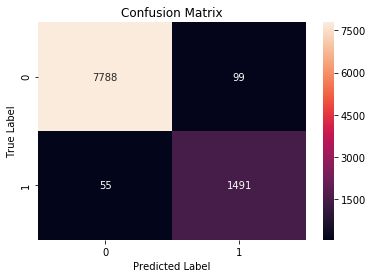

In [75]:
features=df_out.iloc[:,1:]
target=df_out.iloc[:,0]

X_outrain,X_outest,y_outrain,y_outest=train_test_split(features,target,test_size=0.25)

x_outrain=nm.transform(X_outrain)
x_outest=nm.transform(X_outest)

print(rfc3.score(x_outest,y_outest))
matrix= confusion_matrix(y_outest,rfc3.predict(x_outest))


print(matrix)

sns.heatmap(matrix,annot=True,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')


